In [ ]:
import gdown

# Replace 'your_google_drive_link' with the actual link of the file you want to download
#300*300    1Wl-6RT-k-XaLaznkKeHYhqGPOdPhSZTW
#600*600    1WsmMYCz5poZYgdhEpwlW3n1KLyYjbShw
#300*300 color    1WzaZ88vYQ50Io9-2GTVXOzFMRD5zOmGj
google_drive_link = f'https://drive.google.com/uc?id=1WzaZ88vYQ50Io9-2GTVXOzFMRD5zOmGj'

# Specify the output file name
output_file = 'images_dataset.zip'

# Download the file
gdown.download(google_drive_link, output_file, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1WzaZ88vYQ50Io9-2GTVXOzFMRD5zOmGj
From (redirected): https://drive.google.com/uc?id=1WzaZ88vYQ50Io9-2GTVXOzFMRD5zOmGj&confirm=t&uuid=753b9888-57d2-4843-a771-0b039ba2aeca
To: /content/images_dataset.zip
100%|██████████| 97.7M/97.7M [00:02<00:00, 35.5MB/s]


'images_dataset.zip'

In [ ]:
#Unzip file
import zipfile

def unzip_file(zip_path, extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

zip_file_path = '/content/images_dataset.zip'
extracted_folder_path = '/content/extracted_images'

unzip_file(zip_file_path, extracted_folder_path)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import cifar10 # subroutines for fetching the CIFAR-10 dataset
from tensorflow.keras.models import Model # basic class for specifying and training a neural network
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 #pip3 install opencv-python
import urllib
import urllib
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from google.colab.patches import cv2_imshow

In [ ]:
data = pd.read_csv("/content/extracted_images/Train.csv")
#print(data)

#filter Only class 0  4
data = data[(data['diagnosis'] == 0) | (data['diagnosis'] == 4)]

#change class 4 to number 1
data.loc[data['diagnosis'] == 4, 'diagnosis'] = 1
#print(data)

# Randomly select 'diagnosis'
n = 300
random_seed = 42
diagnosis_1_rows = data[data['diagnosis'] == 1].sample(n=n, random_state=random_seed)
diagnosis_0_rows = data[data['diagnosis'] == 0].sample(n=n, random_state=random_seed)

# Combine the selected rows
data_selected = pd.concat([diagnosis_1_rows, diagnosis_0_rows])

# Display the selected rows
print("\nSelected Rows:")
print(data_selected)
print(data_selected['id_code'].iloc[0])


Selected Rows:
         id_code  diagnosis
1063  Train_1064          1
3692  Train_3693          1
268    Train_269          1
3254  Train_3255          1
94      Train_95          1
...          ...        ...
2529  Train_2530          0
4041  Train_4042          0
1241  Train_1242          0
1503  Train_1504          0
1838  Train_1839          0

[600 rows x 2 columns]
Train_1064


In [ ]:
#convert images to matrix
from PIL import Image

def image_to_matrix(image_name):
  all_matrices = []

  for file_name in image_name.to_list():
      # Create the full path to the image file
      image_path = f'/content/extracted_images/images_color_300/{file_name}.jpg'

      # Open the grayscale image
      image = Image.open(image_path)

      # Convert the image to a NumPy array
      image_matrix = np.array(image)

      # Append the matrix to the list
      all_matrices.append(image_matrix)

  # Convert the list of matrices to a NumPy array
  diabetic_retinopathy_data = np.array(all_matrices)
  return diabetic_retinopathy_data


In [ ]:
class_names = ["No", "Yes"]
num_classes = len(class_names)


batch_size = 128 # in each iteration, we consider 128 training examples at once
num_epochs = 128 # (we iterate 200 times over the entire training set) change to 10

'''
kernel_size = 3 # we will use 3x3 kernels throughout
pool_size = 2 # we will use 2x2 pooling throughout
conv_depth_1 = 32 # we will initially have 32 kernels per conv. layer...
conv_depth_2 = 64 # ...switching to 64 after the first pooling layer
drop_prob_1 = 0.25 # dropout after pooling with probability 0.25
drop_prob_2 = 0.5 # dropout in the FC layer with probability 0.5
hidden_size = 512 # the FC layer will have 512 neurons
'''

'\nkernel_size = 3 # we will use 3x3 kernels throughout\npool_size = 2 # we will use 2x2 pooling throughout\nconv_depth_1 = 32 # we will initially have 32 kernels per conv. layer...\nconv_depth_2 = 64 # ...switching to 64 after the first pooling layer\ndrop_prob_1 = 0.25 # dropout after pooling with probability 0.25\ndrop_prob_2 = 0.5 # dropout in the FC layer with probability 0.5\nhidden_size = 512 # the FC layer will have 512 neurons\n'

In [ ]:
#split data
from sklearn.model_selection import train_test_split

X = data_selected['id_code']
Y = data_selected['diagnosis']

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, Y, test_size=0.3, random_state=random_seed)

X_train = image_to_matrix(X_train_raw)
print(X_train.shape)
X_test = image_to_matrix(X_test_raw)
y_train = y_train_raw.to_numpy()
y_test = y_test_raw.to_numpy()
print(y_train[0])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

Y_train = tf.keras.utils.to_categorical(y_train, 2) # One-hot encode the labels
Y_test = tf.keras.utils.to_categorical(y_test, 2) # One-hot encode the labels
class_names[np.argmax (Y_train[0])]

(420, 300, 300, 3)
1


'Yes'

In [ ]:
#create neural networks structure
model = Sequential()

#1st convolution layer
model.add(Conv2D(16, (27, 27) #16 is number of filters and (27, 27) is the size of the filter.
    , input_shape=(300, 300,3) , name='Conv1'))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(27, 27), name='Conv2')) # apply 32 filters sized of (27, 27) on 2nd convolution layer
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(27, 27), name='Conv3')) # apply 64 filters sized of (27, 27) on 3rd convolution layer
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(27, 27), name='Conv4')) # apply 128 filters sized of (27, 27) on 4th convolution layer
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Fully connected layer. 1 hidden layer consisting of 512 nodes
model.add(Dense(512, name='Dense1'))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax', name='Dense2'))
print(model.summary())

model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer=keras.optimizers.Adam(learning_rate=0.001), # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 274, 274, 16)      35008     
                                                                 
 activation (Activation)     (None, 274, 274, 16)      0         
                                                                 
 Conv2 (Conv2D)              (None, 248, 248, 32)      373280    
                                                                 
 activation_1 (Activation)   (None, 248, 248, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 32)      0         
 D)                                                              
                                                                 
 Conv3 (Conv2D)              (None, 98, 98, 64)        1493056   
                                                        

In [ ]:
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epochs,
          verbose=1, validation_split=0.1) # ...holding out 10% of the data for validation

Epoch 1/128
3/3 [==============================] - 1325s 329s/step - loss: 233870.4531 - accuracy: 0.4683 - val_loss: 77604.8047 - val_accuracy: 0.5238
Epoch 2/128
3/3 [==============================] - 14s 5s/step - loss: 175417.2031 - accuracy: 0.5079 - val_loss: 2285.8770 - val_accuracy: 0.5238
Epoch 3/128
3/3 [==============================] - 14s 5s/step - loss: 19743.7559 - accuracy: 0.4709 - val_loss: 274.0078 - val_accuracy: 0.4762
Epoch 4/128
3/3 [==============================] - 14s 5s/step - loss: 854.6845 - accuracy: 0.4815 - val_loss: 60.6155 - val_accuracy: 0.4762
Epoch 5/128
3/3 [==============================] - 14s 5s/step - loss: 2128.0945 - accuracy: 0.4841 - val_loss: 821.4542 - val_accuracy: 0.4762
Epoch 6/128
3/3 [==============================] - 14s 5s/step - loss: 1033.0687 - accuracy: 0.5238 - val_loss: 32.0719 - val_accuracy: 0.5000
Epoch 7/128
3/3 [==============================] - 14s 5s/step - loss: 1035.2094 - accuracy: 0.4709 - val_loss: 605.1765 - val_

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=1)  # Evaluate the trained model on the test set!
print(Y_test.shape)
print('Test loss:', score[0])
print('Test accuracy:', 100*score[1])

6/6 [==============================] - 37s 3s/step - loss: 2.8863 - accuracy: 0.7833
(180, 2)
Test loss: 2.8862547874450684
Test accuracy: 78.33333611488342


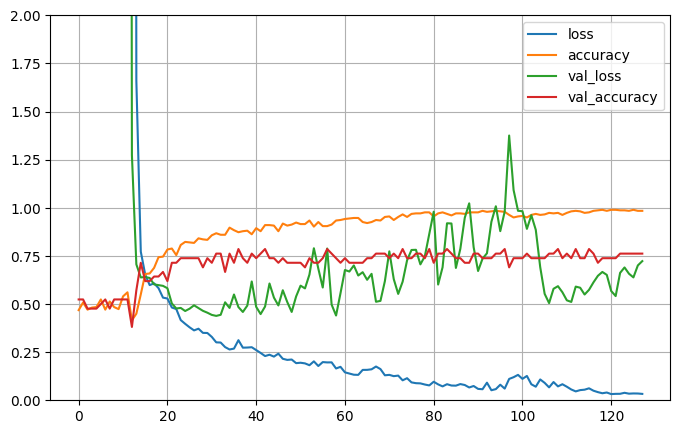

In [ ]:
err_hist = history.history
pd.DataFrame(err_hist).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2) # set the vertical range to [0-1]
plt.show()

6/6 [==============================] - 2s 295ms/step
[[72 10]
 [29 69]]
              precision    recall  f1-score   support

          No       0.71      0.88      0.79        82
         Yes       0.87      0.70      0.78        98

    accuracy                           0.78       180
   macro avg       0.79      0.79      0.78       180
weighted avg       0.80      0.78      0.78       180



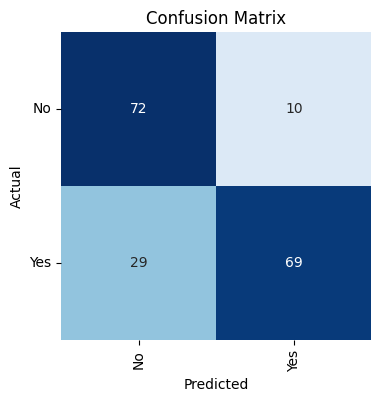

In [ ]:
predictions = model.predict(X_test)

cm = confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(predictions,axis=1), labels=np.arange(num_classes))
print(cm)
clr = classification_report(np.argmax(Y_test, axis=1), np.argmax(predictions,axis=1), labels=np.arange(num_classes), target_names=class_names)
print(clr)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(2) + 0.5, labels=class_names, rotation=90)
plt.yticks(ticks=np.arange(2) + 0.5, labels=class_names, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig('Confusion Matrix55.png')
plt.show()


In [ ]:
"""
#1st convolution layer
model.add(Conv2D(32, (33, 33) #32 is number of filters and (3, 3) is the size of the filter.
    , input_shape=(300, 300,1) , name='Conv1'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(33, 33), name='Conv2')) # apply 64 filters sized of (3x3) on 2nd convolution layer
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(33, 33), name='Conv3')) # apply 64 filters sized of (3x3) on 2nd convolution layer
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
"""

"\n#1st convolution layer\nmodel.add(Conv2D(32, (33, 33) #32 is number of filters and (3, 3) is the size of the filter.\n    , input_shape=(300, 300,1) , name='Conv1'))\nmodel.add(Activation('relu'))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\n\nmodel.add(Conv2D(64,(33, 33), name='Conv2')) # apply 64 filters sized of (3x3) on 2nd convolution layer\nmodel.add(Activation('relu'))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\n\nmodel.add(Conv2D(128,(33, 33), name='Conv3')) # apply 64 filters sized of (3x3) on 2nd convolution layer\nmodel.add(Activation('relu'))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\n"